<a href="https://colab.research.google.com/github/pentadotddot/CVZONE_drone/blob/main/Monas_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
import pandas as pd
import numpy as np
import os
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline


Here I load the data, which was obtained after scraping all the Monas from rarity tools. I took screenshots of every Mona, cropped the images to cards (see in the attachment), then I applied an OCR (Optical Character Recognition ) algorithm, where the neural network "read" all the properties of the Monas. Then I created a dataframe of the Monas. Here we have just the ID, Rarity Rank, Rarity Score and price of them, but soon I will also take into account all their properties, like what they wear, what is the background and so on...
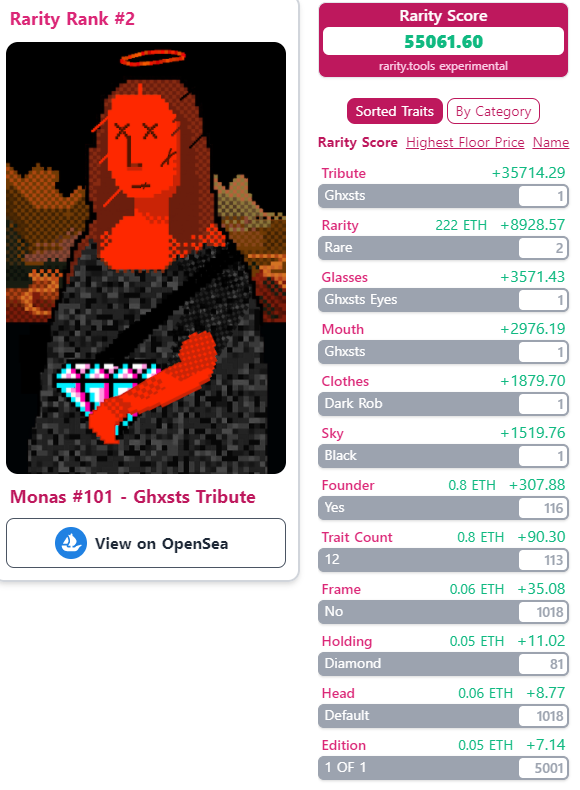


# Here I load the csv into a pandas dataframe to further analysis.

In [214]:
monas_df = pd.read_csv('./Monas_4299.csv')  

In [215]:
monas_df.head()


,Unnamed: 0,ID,Rarity Rank,Rarity Score,price
0,0,Special Founders 1-,3.0,33088.18,60 ETH
1,1,2,49.0,589.50,NaN
2,2,3,27.0,620.82,NaN
3,3,4,116.0,530.52,NaN
4,4,5,56.0,583.18,NaN


#I suppose that in a rational market price should be directly proportional to rarity.

In [216]:
# theoretical approximation
# suppose completely rational market -> price ~ rarity metric

def P(r,r_max,D):
  return (1.0 + r/r_max)**D

In [217]:
r_max = monas_df["Rarity Score"].max()

In [218]:
r_max

55061.6

#I do some data processing, such as formatting the price to numbers (there is ETH written in the price), if there is no price I interchange it to 0 and so on...

In [219]:
rarity_vs_price = monas_df[["ID","price","Rarity Score"]]

In [220]:
rarity_vs_price["price"] = rarity_vs_price["price"].apply(lambda x: str(x).split("ETH")[0] )
rarity_vs_price["price"] = rarity_vs_price["price"].replace('nan',0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [221]:
rarity_vs_price["price"]

0          60 
1            0
2            0
3            0
4            0
         ...  
4294        2 
4295     0.05 
4296         0
4297        2 
4298          
Name: price, Length: 4299, dtype: object

In [222]:
rarity_vs_price["price"] = pd.to_numeric(rarity_vs_price["price"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#Here I do a simple scatter plot of all 5000 Monas price in the function of their Rarity Score. We can see that there are ridiculous prices, supposedely to reserve the Monas, or because of fun:) We have to zoom in a bit to filter outlier data.

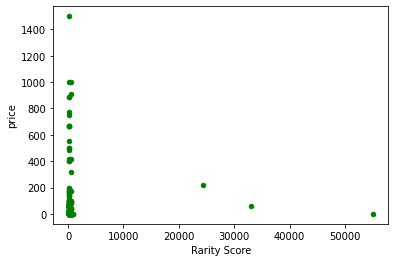

In [223]:
rarity_vs_price.plot.scatter(x="Rarity Score", y="price",color='green', marker='o')

#I also calculate the correlation between price and rarity, if the correlation is 1, the datapair is basically identical, if its 0, there is no correlation between them (price is not describing well rarity ) and if its negative then they are inversely correlated (in this case price would be lower when rarity is high...).

In [224]:
rarity_vs_price["price"]. corr(rarity_vs_price["Rarity Score"])

0.03406817977119621

As we can see in the case when all 5000 Monas are taken into account, the correlation is basically 0...

# So here I filter out outliers as I filter out all Monas which below e.g. 3 ETH. 

In [225]:
rarity_vs_price["price"] = rarity_vs_price["price"][rarity_vs_price["price"] < 3]
rarity_vs_price["price"] = rarity_vs_price["price"][rarity_vs_price["price"] > 0.0001]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# In this case the correlation increases significantly, as these prices are much more rational.

In [226]:
rarity_vs_price["Rarity Score"]. corr(rarity_vs_price["price"].dropna())

0.45162222167158217

In [227]:
df_filtered = rarity_vs_price.dropna()

# Here I plot the data, and with the describe() function, I highlight some statistical properties of the filtered dataset, such as mean, standard deviation and so on...
It is interesting to see that there are horizontal lines along round prices as expected (3,2.5,1.5,1,0.5...
)

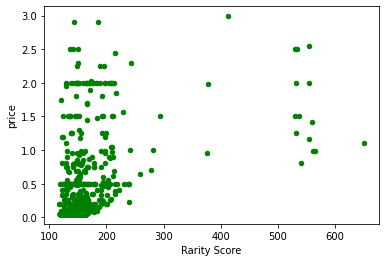

In [228]:
df_filtered.plot.scatter(x="Rarity Score", y="price",color='green', marker='o')

In [229]:
df_filtered.describe()

,price,Rarity Score
count,2272.000000,2272.000000
mean,0.165158,148.848864
std,0.379494,37.277410
min,0.050000,117.900000
25%,0.050000,134.557500
50%,0.050000,144.070000
75%,0.050000,154.417500
max,2.990000,650.080000


# Here I filter again, all data below 0.5 ETH.

In [230]:
rarity_vs_price["price"] = rarity_vs_price["price"][rarity_vs_price["price"] < 0.5]
rarity_vs_price["price"] = rarity_vs_price["price"][rarity_vs_price["price"] > 0.0001]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [231]:
df_filtered = rarity_vs_price.dropna()

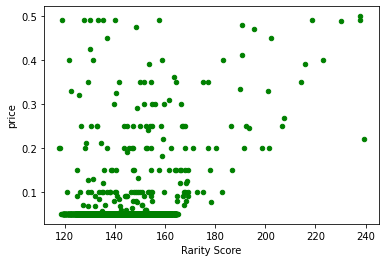

In [232]:
df_filtered.plot.scatter(x="Rarity Score", y="price",color='green', marker='o')

In [233]:
df_filtered.describe()

,price,Rarity Score
count,2066.000000,2066.000000
mean,0.064139,144.139661
std,0.059158,13.691028
min,0.050000,117.900000
25%,0.050000,134.032500
50%,0.050000,143.145000
75%,0.050000,153.117500
max,0.499000,239.230000
